In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/kaggle/input/og-fake-data/OGFAKE DATA.xlsx')

In [3]:
df = df.dropna()

In [4]:
df['status'].value_counts()

status
ACCEPTED    12944
REJECTED     9535
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22479 entries, 0 to 28308
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              22479 non-null  object 
 1   experience          22479 non-null  float64
 2   present_ctc         22479 non-null  float64
 3   expected_ctc        22479 non-null  float64
 4   notice_period       22479 non-null  int64  
 5   candidate_profiles  22479 non-null  object 
 6   job_categories      22479 non-null  object 
 7   designation         22479 non-null  object 
 8   job_id              22479 non-null  int64  
 9   exp_min             22479 non-null  float64
 10  exp_max             22479 non-null  float64
 11  ctc_fixed_min       22479 non-null  float64
 12  ctc_fixed_max       22479 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 2.4+ MB


In [6]:
'''
import warnings
warnings.filterwarnings("ignore")
'''

'\nimport warnings\nwarnings.filterwarnings("ignore")\n'

In [7]:
def fix_ctc_values(df1):
    def fix_ctc_lpa(x):
        if x > 1000:
            return x/100000
        else:
            return x

    df1['expected_ctc'] = df1['expected_ctc'].apply(fix_ctc_lpa)
    df1['present_ctc'] = df1['present_ctc'].apply(fix_ctc_lpa)
    return df1

fix_ctc_values(df)

,status,experience,present_ctc,expected_ctc,notice_period,candidate_profiles,job_categories,designation,job_id,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
0,REJECTED,2.00,3.60,4.14,15,Developer Operations,"Inside Sales (Outbound),Sales",Financial Analyst,14,0.5,3.0,3.0,5.0
1,REJECTED,11.00,3.00,4.00,1,Curriculum Designer,"Inside Sales (Outbound),Sales",Accountant,14,0.5,3.0,3.0,5.0
2,REJECTED,2.50,5.00,5.75,15,Software Engineer,Frontend Developer,Sales Executive,3,2.0,4.0,6.0,10.0
3,REJECTED,4.08,7.00,8.05,15,Media Producer,Frontend Developer,Client Relations Manager,3,2.0,4.0,6.0,10.0
4,REJECTED,3.50,4.00,8.00,1,HR Specialist,Developer Operations,Project Coordinator,4,1.0,5.0,6.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,ACCEPTED,5.50,8.45,11.00,15,Area Sales Executive|||Sales Executive|||Sales...,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0
28305,ACCEPTED,3.67,6.00,8.00,15,Team Lead,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0
28306,ACCEPTED,5.50,6.65,9.00,1,Area Sales Manager|||Business Development Exec...,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0
28307,ACCEPTED,5.00,6.20,8.50,1,Business Development Associate|||Business Deve...,Business development,Team Lead (Mumbai),3527,3.0,5.5,7.0,11.0


In [8]:
import re

def clean_text_columns(df):
    columns = ['candidate_profiles', 'designation']
    clean_pattern = r'[!@#$%^&*()_+{}\[\-]:;<>,.?~\\/|"]'
    for col in columns:
        df[col] = df[col].apply(lambda x: re.sub(clean_pattern, ' ', str(x)))
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True).str.strip()
        df[col] = df[col].str.lower()  # Convert to lowercase
    return df

clean_text_columns(df)

,status,experience,present_ctc,expected_ctc,notice_period,candidate_profiles,job_categories,designation,job_id,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
0,REJECTED,2.00,3.60,4.14,15,developer operations,"Inside Sales (Outbound),Sales",financial analyst,14,0.5,3.0,3.0,5.0
1,REJECTED,11.00,3.00,4.00,1,curriculum designer,"Inside Sales (Outbound),Sales",accountant,14,0.5,3.0,3.0,5.0
2,REJECTED,2.50,5.00,5.75,15,software engineer,Frontend Developer,sales executive,3,2.0,4.0,6.0,10.0
3,REJECTED,4.08,7.00,8.05,15,media producer,Frontend Developer,client relations manager,3,2.0,4.0,6.0,10.0
4,REJECTED,3.50,4.00,8.00,1,hr specialist,Developer Operations,project coordinator,4,1.0,5.0,6.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28304,ACCEPTED,5.50,8.45,11.00,15,area sales executive|||sales executive|||sales...,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0
28305,ACCEPTED,3.67,6.00,8.00,15,team lead,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0
28306,ACCEPTED,5.50,6.65,9.00,1,area sales manager|||business development exec...,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0
28307,ACCEPTED,5.00,6.20,8.50,1,business development associate|||business deve...,Business development,team lead (mumbai),3527,3.0,5.5,7.0,11.0


In [10]:
df.shape

(22479, 13)

In [11]:
df.columns

Index(['status', 'experience', 'present_ctc', 'expected_ctc', 'notice_period',
       'candidate_profiles', 'job_categories', 'designation', 'job_id',
       'exp_min', 'exp_max', 'ctc_fixed_min', 'ctc_fixed_max'],
      dtype='object')

In [12]:
import numpy as np

# Replace 'nan' with actual NaN representation recognized by pandas
df.replace('nan', np.nan, inplace=True)

# Drop rows with NaN values
df = df.dropna()

# Check the shape of X_cleaned after dropping NaN values
print(df.shape)

(22479, 13)


In [13]:
!pip install --quiet -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
model = SentenceTransformer("llmrails/ember-v1")

In [15]:
def make_embeddings(X):
    similarity = []

    for index, row in X.iterrows():
        job_embeddings = model.encode(row['designation'], show_progress_bar=False)
        candidate_embeddings = model.encode(row['candidate_profiles'], show_progress_bar=False)

        # Cosine Similarity
        cosine_sim = cosine_similarity([candidate_embeddings], [job_embeddings])[0][0]

        # Append to list
        similarity.append(cosine_sim)
        
        # Set 'profile_relevance' value for the current row
        X.loc[index, 'profile_relevance'] = cosine_sim

    return X['profile_relevance']

make_embeddings(df)

0        0.480256
1        0.437798
2        0.585832
3        0.581464
4        0.537166
           ...   
28304    0.518949
28305    0.851072
28306    0.508323
28307    0.571046
28308    0.448481
Name: profile_relevance, Length: 22479, dtype: float64

In [16]:
# Define the numeric features and scale them
numeric_features = ['experience', 'present_ctc', 'expected_ctc', 'notice_period', 'exp_min', 'exp_max', 'ctc_fixed_min', 'ctc_fixed_max']
   
# Concatenate the scaled numeric features with 'profile_relevance'
X= pd.concat([df['profile_relevance'].reset_index(),df[numeric_features],df['status']], axis=1)
X= X.iloc[:, 1:]
X.columns = X.columns.astype(str)
X.sample(10)

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
19036,1.000000,3.00,6.50,11.00,30.0,3.0,6.00,25.0,45.0,ACCEPTED
21119,0.498585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4535,0.709865,2.60,3.20,4.00,7.0,1.0,4.00,3.0,5.5,ACCEPTED
4485,0.435354,0.00,0.00,2.40,1.0,0.0,2.00,2.0,2.4,ACCEPTED
4955,0.514959,2.00,4.50,5.00,1.0,0.5,5.00,4.0,6.5,ACCEPTED
13845,0.532440,3.40,12.00,21.00,15.0,3.5,5.00,25.0,32.0,ACCEPTED
24980,NaN,7.00,6.70,9.00,15.0,0.0,0.80,3.0,5.0,ACCEPTED
21698,0.881571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27735,NaN,0.01,0.01,0.01,1.0,0.0,0.06,1.0,1.2,ACCEPTED
7129,0.526135,0.60,5.00,5.50,0.0,0.5,3.00,3.0,5.5,ACCEPTED


In [17]:
df[numeric_features]

,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
0,2.00,3.60,4.14,15,0.5,3.0,3.0,5.0
1,11.00,3.00,4.00,1,0.5,3.0,3.0,5.0
2,2.50,5.00,5.75,15,2.0,4.0,6.0,10.0
3,4.08,7.00,8.05,15,2.0,4.0,6.0,10.0
4,3.50,4.00,8.00,1,1.0,5.0,6.0,10.0
...,...,...,...,...,...,...,...,...
28304,5.50,8.45,11.00,15,3.0,5.5,7.0,11.0
28305,3.67,6.00,8.00,15,3.0,5.5,7.0,11.0
28306,5.50,6.65,9.00,1,3.0,5.5,7.0,11.0
28307,5.00,6.20,8.50,1,3.0,5.5,7.0,11.0


In [18]:
# Encode the target variable into numeric format
from sklearn.preprocessing import LabelEncoder

# Encode the target variable into numeric format
label_encoder = LabelEncoder()
y = df['status']
y = label_encoder.fit_transform(y)

# Reverse the encoding
y = 1 - y

# Reshape y as a 1-dimensional array
y = y.ravel()

In [19]:
X.sample(5)

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
8627,1.000000,4.5,3.36,5.0,60.0,5.0,15.0,7.0,18.0,ACCEPTED
15764,0.791834,5.0,2.50,4.5,15.0,0.3,7.0,3.0,8.0,ACCEPTED
11583,0.855434,9.0,14.50,18.0,15.0,8.0,15.0,20.0,26.0,REJECTED
11634,0.835366,3.0,3.70,5.0,15.0,1.0,4.0,4.0,6.0,REJECTED
12887,0.522091,1.2,7.00,11.0,30.0,0.5,5.0,10.0,30.0,REJECTED


In [20]:
# Check for other representations of missing values
for col in X.columns:
    print(col, X[col].unique())

profile_relevance [0.48025638 0.4377982  0.5858317  ... 0.50832301 0.57104605        nan]
experience [2.000e+00 1.100e+01 2.500e+00 4.080e+00 3.500e+00 3.300e+00 7.000e+00
 0.000e+00 3.170e+00 3.000e+00 4.420e+00 4.000e+00 3.750e+00 1.000e+01
 1.400e+00 5.000e+00 5.500e+00 2.170e+00 6.000e+00 2.200e+00 1.500e+00
 1.000e+00 1.920e+00 3.670e+00 6.170e+00 1.110e+00 3.330e+00 5.700e+00
 1.800e+00 1.420e+00 2.600e+00 1.500e+01 5.200e+00 3.900e+00 3.600e+00
 5.750e+00 4.500e+00 4.200e+00 3.250e+00 2.700e+00 1.700e+00 1.600e+00
 1.100e+00 3.100e+00 2.400e+00 4.300e+00 8.000e+00 4.400e+00 2.300e+00
 1.250e+00 4.600e+00 4.700e+00 4.100e+00 3.400e+00 1.900e+01 2.900e+00
 2.750e+00 5.800e+00 1.250e+01 9.000e+00 3.800e+00 2.800e+00 4.800e+00
 5.400e+00 5.100e+00 5.300e+00 2.100e+00 6.000e-01 1.300e+00 4.750e+00
 3.700e+00 3.420e+00 7.500e+00 5.670e+00 1.200e+00 6.500e+00 4.250e+00
 5.600e+00 2.300e+01 3.200e+00 1.200e+01 6.600e+00 3.110e+00 5.110e+00
 1.300e+01 5.420e+00 4.110e+00 1.580e+00 3.830e

In [21]:
y.shape

(22479,)

In [22]:
X.shape

(24937, 10)

In [23]:
# Replace 'nan' with actual NaN representation recognized by pandas in X
X.replace('nan', np.nan, inplace=True)

# Remove rows with NaN values
X = X.dropna(inplace=False)

# Check the shape of X_cleaned after dropping NaN values
print(X.shape)

(20021, 10)


In [26]:
X.sample(5)

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max,status
13337,0.553780,3.03,3.20,6.8,15.0,1.0,5.0,2.4,4.0,REJECTED
15061,0.714400,4.50,14.50,24.0,30.0,2.0,4.0,15.0,35.0,ACCEPTED
8107,0.815603,6.00,24.00,28.0,30.0,5.0,9.0,25.0,30.0,ACCEPTED
13386,0.850188,5.00,12.89,20.0,30.0,5.0,7.0,15.0,25.0,ACCEPTED
3420,0.638871,10.00,5.20,6.0,30.0,2.0,7.0,4.0,6.0,REJECTED


In [27]:
y = X.iloc[:,-1]

In [28]:
X = X.iloc[:,:-1]

In [29]:
y.shape, X.shape

((20021,), (20021, 9))

In [30]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((16016, 9), (4005, 9))

In [31]:
X.duplicated().sum()

1

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

## Feature Selection- With Pearson Correlation

In [36]:
X_train.corr()

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
profile_relevance,1.000000,-0.002316,0.020254,0.023147,-0.010343,0.003325,-0.008973,-0.001606,-0.001599
experience,-0.002316,1.000000,0.327010,0.307301,0.002400,0.519358,0.527483,-0.005743,-0.005683
present_ctc,0.020254,0.327010,1.000000,0.841422,0.016434,0.390256,0.294456,0.000364,0.000610
expected_ctc,0.023147,0.307301,0.841422,1.000000,0.012593,0.398431,0.280439,0.000006,0.000281
notice_period,-0.010343,0.002400,0.016434,0.012593,1.000000,-0.006850,-0.002912,-0.000069,-0.000072
exp_min,0.003325,0.519358,0.390256,0.398431,-0.006850,1.000000,0.754578,-0.004773,-0.004755
exp_max,-0.008973,0.527483,0.294456,0.280439,-0.002912,0.754578,1.000000,-0.007741,-0.007569
ctc_fixed_min,-0.001606,-0.005743,0.000364,0.000006,-0.000069,-0.004773,-0.007741,1.000000,1.000000
ctc_fixed_max,-0.001599,-0.005683,0.000610,0.000281,-0.000072,-0.004755,-0.007569,1.000000,1.000000


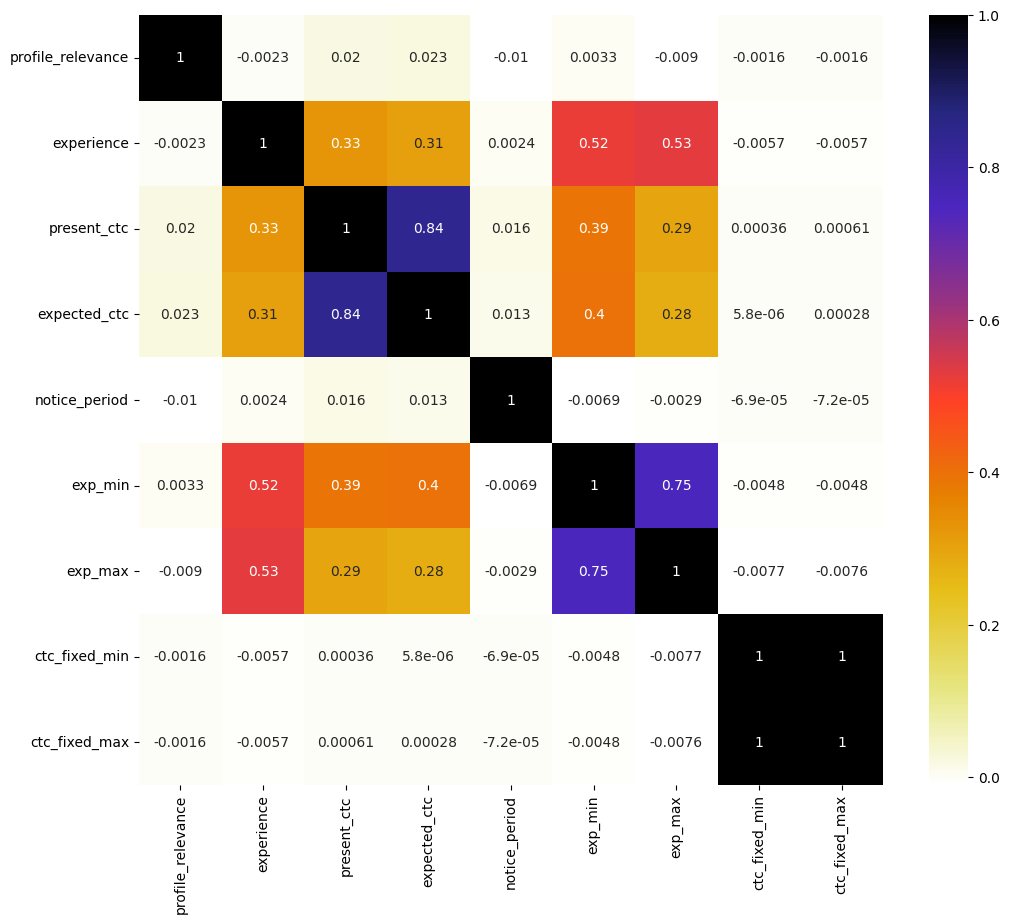

In [37]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [38]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [40]:
corr_features

{'ctc_fixed_max', 'exp_max', 'expected_ctc'}

In [ ]:
#X_train.drop(corr_features,axis=1)
#X_test.drop(corr_features,axis=1)

## Feature Selection-Information gain - mutual information In Classification Problem Statements

In [41]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01402156, 0.00081319, 0.        , 0.00054027, 0.        ,
       0.00301178, 0.00092575, 0.00877888, 0.01340914])

In [45]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

profile_relevance    0.014022
ctc_fixed_max        0.013409
ctc_fixed_min        0.008779
exp_min              0.003012
exp_max              0.000926
experience           0.000813
expected_ctc         0.000540
present_ctc          0.000000
notice_period        0.000000
dtype: float64

## Fisher Score For Feature Selection

In [57]:
X.sample(10)

,profile_relevance,experience,present_ctc,expected_ctc,notice_period,exp_min,exp_max,ctc_fixed_min,ctc_fixed_max
18608,0.579716,6.50,6.5,9.0,30.0,3.0,9.0,7.0,11.0
19142,0.606135,4.60,21.0,27.0,60.0,3.0,5.0,22.0,25.0
18384,0.603480,4.00,20.0,36.0,7.0,5.0,8.0,35.0,55.0
10128,0.560567,3.50,7.0,13.0,1.0,3.0,6.0,10.0,15.0
15684,0.744267,8.00,8.0,11.0,30.0,4.0,8.0,12.0,20.0
7946,0.719019,4.00,9.5,9.5,7.0,4.0,10.0,7.0,9.0
15211,0.754303,2.20,4.2,7.0,40.0,1.0,3.0,12.0,17.0
6702,0.764171,4.42,3.0,5.5,20.0,3.0,6.0,3.5,5.0
16061,0.752751,9.00,9.0,12.5,60.0,1.0,5.0,6.0,13.0
16394,0.567896,11.00,40.0,47.0,60.0,7.0,12.0,45.0,65.0


In [47]:
y.sample(5)

5221     REJECTED
8660     ACCEPTED
12514    ACCEPTED
17554    REJECTED
2881     REJECTED
Name: status, dtype: object

In [59]:
import numpy as np
import pandas as pd

def fisher_score(X, y):
    unique_classes = np.unique(y)
    num_classes = len(unique_classes)
    num_features = X.shape[1]
    fisher_scores = []

    for i in range(num_features):
        feature_values = X.iloc[:, i]
        feature_score = 0.0
        
        for cls in unique_classes:
            class_samples = X[y == cls].iloc[:, i]
            class_mean = np.mean(class_samples)
            
            within_class_variance = np.var(class_samples)
            overall_mean = np.mean(feature_values)
            between_class_variance = len(class_samples) * ((class_mean - overall_mean) ** 2)
            
            if within_class_variance != 0:
                feature_score += between_class_variance / within_class_variance
        
        fisher_scores.append(feature_score)

    return fisher_scores, X.columns.tolist()  # Return scores and feature names

# Assuming X is a DataFrame with feature names as columns
# Calculate Fisher Scores and retrieve feature names
fisher_scores, feature_names = fisher_score(X, y)

# Print Fisher Scores for each feature with names
for name, score in zip(feature_names, fisher_scores):
    print(f"Feature- {name}: Fisher Score - {score:.2f}")

Feature- profile_relevance: Fisher Score - 30.81
Feature- experience: Fisher Score - 28.55
Feature- present_ctc: Fisher Score - 0.07
Feature- expected_ctc: Fisher Score - 7.35
Feature- notice_period: Fisher Score - 2.23
Feature- exp_min: Fisher Score - 129.40
Feature- exp_max: Fisher Score - 67.54
Feature- ctc_fixed_min: Fisher Score - 107155.05
Feature- ctc_fixed_max: Fisher Score - 86903.38


The Fisher Scores highlight the discriminatory power of each feature in differentiating between accepted and rejected statuses.

Profile Relevance (30.81) and Experience (28.55) exhibit relatively high Fisher Scores. This suggests their significant ability to distinguish between accepted and rejected candidates, indicating their importance in the classification process.

Features Exp_Min (129.40), Exp_Max (67.54), CTC_Fixed_Min (107155.05), and CTC_Fixed_Max (86903.38) display notably higher Fisher Scores, emphasizing their substantial discriminatory power. These features are likely pivotal in discerning between the classes of accepted and rejected applications.

On the other hand, Present CTC (0.07), Expected CTC (7.35), and Notice Period (2.23) showcase lower Fisher Scores. This implies that these features might have lesser influence or contribute less significantly to differentiating between accepted and rejected applications compared to other features.

In essence, higher Fisher Scores signify features that wield more relevance and influence in distinguishing between accepted and rejected statuses in the dataset. Features with higher Fisher Scores are considered more vital or informative in determining the suitability of candidates for a particular job description.